<h1 style="color:Red">Import the libraries</h1> 

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h1 style="color:Red">Get the dataset understand</h1> 

In [208]:
df=pd.read_csv('titanic.csv')

<h1 style="color:Red">Clean the dataset</h1> 

<ol>
<li>check for duplicates</li>
<li>check for missing values</li>
<li>check for invalid dtypes</li>
</ol>

<h3 style='color:pink'>check for missing value</h3>

In [209]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [210]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


<h3 style='color:Skyblue'>Observation: <ul>
<li>Age column must be handled (age col has missing values) </li>
<li>fair column must be handled (fair col has missing values) </li>
<li>cabin column must be removed (cabin col has too many missing values and unwanted also.) </li>
<li>embarked column must be handled (embarked col has missing values) </li>
</ul></h3>

<h3 style='color:pink'>check for duplicates</h3>

In [212]:
df.duplicated().any()

np.False_

In [213]:
df.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1


<h3 style='color:pink'>check for invalid datatype</h3>

In [ ]:
md_age = df['age'].median()
md_fare = df['fare'].median()
# -------------------------------------------
m_emb = df['embarked'].mode()[0]


# -------------------------------------------
# check for outliers

# sns.boxplot(data=df,x='age')
# sns.boxplot(data=df,x='fare')
# sns.boxplot(data=df,x='embarked')

In [215]:
df['age'] = df['age'].fillna(md_age)
df['fare'] = df['fare'].fillna(md_fare)
df['embarked'] = df['embarked'].fillna(m_emb)

In [216]:
# df
# df.dropna(axis=1)

df=df.drop(columns=['cabin'])

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   embarked  1309 non-null   object 
 9   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


<h1 style="color:Red">Feature engineering / Data transformation  
</h1> 

<ol>
<li>create new columns if needed </li>
<li>modify the data if needed</li>
</ol>

In [218]:
# df['embarked'].unique()

In [219]:
df['embarked']=df['embarked'].replace({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})

In [220]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,0


In [221]:
df['family_count']=df['sibsp']+df['parch']

In [222]:
df=df.drop(columns=['sibsp','parch'])

In [223]:
df[['last_name','tit_fname']]=df['name'].str.split(',',expand=True)

In [224]:
df[['title','first_name']]=df['tit_fname'].str.split('.',n=1,expand=True)

In [225]:
for col in ['title','first_name','last_name']:
    df[col]=df[col].str.strip()

In [226]:
df=df.drop(columns=['name','tit_fname'])

In [227]:
df.columns

Index(['pclass', 'sex', 'age', 'ticket', 'fare', 'embarked', 'survived',
       'family_count', 'last_name', 'title', 'first_name'],
      dtype='object')

In [228]:
lst=['title','first_name','last_name','sex','age','family_count','ticket','pclass','fare','embarked','survived']
df=df[lst]

In [229]:
df=df.rename(columns={'sex':'gender'})

In [230]:
df['age']=df['age'].round(2)
df['fare']=df['fare'].round(2)

In [231]:
df

,title,first_name,last_name,gender,age,family_count,ticket,pclass,fare,embarked,survived
0,Miss,Elisabeth Walton,Allen,female,29.00,0,24160,1,211.34,Southampton,1
1,Master,Hudson Trevor,Allison,male,0.92,3,113781,1,151.55,Southampton,1
2,Miss,Helen Loraine,Allison,female,2.00,3,113781,1,151.55,Southampton,0
3,Mr,Hudson Joshua Creighton,Allison,male,30.00,3,113781,1,151.55,Southampton,0
4,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,female,25.00,3,113781,1,151.55,Southampton,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,Miss,Hileni,Zabour,female,14.50,1,2665,3,14.45,Cherbourg,0
1305,Miss,Thamine,Zabour,female,28.00,1,2665,3,14.45,Cherbourg,0
1306,Mr,Mapriededer,Zakarian,male,26.50,0,2656,3,7.22,Cherbourg,0
1307,Mr,Ortin,Zakarian,male,27.00,0,2670,3,7.22,Cherbourg,0


In [232]:
def f1(d):
    if d['family_count']>0:
        return 'family/friends'
    else:
        return 'solo'
df['companion_type']=df.apply(f1,axis=1)    

In [233]:
df.head()

,title,first_name,last_name,gender,age,family_count,ticket,pclass,fare,embarked,survived,companion_type
0,Miss,Elisabeth Walton,Allen,female,29.00,0,24160,1,211.34,Southampton,1,solo
1,Master,Hudson Trevor,Allison,male,0.92,3,113781,1,151.55,Southampton,1,family/friends
2,Miss,Helen Loraine,Allison,female,2.00,3,113781,1,151.55,Southampton,0,family/friends
3,Mr,Hudson Joshua Creighton,Allison,male,30.00,3,113781,1,151.55,Southampton,0,family/friends
4,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,female,25.00,3,113781,1,151.55,Southampton,0,family/friends


<h1 style="color:Red">PANDAS QUESTIONS :</h1>

<h3 style="color:orange">1. Sort the data according to the ascending order of the ticket. </h3>

In [234]:
df=df.sort_values(by=['ticket'],ascending=True)

In [235]:
df= df.reset_index(drop = True)

<h3 style="color:orange">2. Create a new column called age_category (child,teen,adult,senior)</h3>

In [236]:
def f2(d):
    if d['age']<=12:
        return 'child'
    elif d['age']>12 and d['age']<=18:
        return 'teen'
    elif d['age']>18 and d['age']<=55:
        return 'adult'
    else:
        return 'senior'

df['age_category']=df.apply(f2,axis=1)

In [237]:
df['age_category']=pd.cut(df['age'],bins=[0,12,18,55,90],labels=['child','teen','adult','senior'],include_lowest=True)

<h3 style="color:orange">3. Get the count of passengers</h3>

In [238]:
df.shape[0]

# or

len(df)

1309

In [239]:
print(df['family_count'].count())

1309


<h3 style="color:orange">4. Get the passengers details if their fare is 0.</h3>

In [240]:
df.loc[df['fare']==0]

# or


df.query('fare==0')

,title,first_name,last_name,gender,age,family_count,ticket,pclass,fare,embarked,survived,companion_type,age_category
22,Mr,Thomas Jr,Andrews,male,39.0,0,112050,1,0.0,Southampton,0,solo,adult
23,Mr,Roderick Robert Crispin,Chisholm,male,28.0,0,112051,1,0.0,Southampton,0,solo,adult
24,Mr,William Henry Marsh,Parr,male,28.0,0,112052,1,0.0,Southampton,0,solo,adult
26,Mr,Joseph Bruce,Ismay,male,49.0,0,112058,1,0.0,Southampton,1,solo,adult
27,Mr,Richard,Fry,male,28.0,0,112058,1,0.0,Southampton,0,solo,adult
28,Mr,William,Harrison,male,40.0,0,112059,1,0.0,Southampton,0,solo,adult
206,Jonkheer,John George,Reuchlin,male,38.0,0,19972,1,0.0,Southampton,0,solo,adult
278,Mr,"Francis ""Frank""",Parkes,male,28.0,0,239853,2,0.0,Southampton,0,solo,adult
279,Mr,Alfred Fleming,Cunningham,male,28.0,0,239853,2,0.0,Southampton,0,solo,adult
280,Mr,William,Campbell,male,28.0,0,239853,2,0.0,Southampton,0,solo,adult


<h3 style="color:orange">5. Get the gender wise passengers count and survival rate.</h3>

In [241]:
gender_stats = df.groupby('gender').agg(
    passenger_count=('gender', 'count'),
    survival_rate=('survived', 'mean')
)
gender_stats['survival_rate'] = (gender_stats['survival_rate'] * 100).round(2)
gender_stats

,passenger_count,survival_rate
gender,,
female,466,72.75
male,843,19.10


In [242]:
df.groupby('gender').agg({'family_count':'count','gender':'count','survived':'mean'}).round(2)

,family_count,gender,survived
gender,,,
female,466,466,0.73
male,843,843,0.19


<h3 style="color:orange">6. Get the pclass wise passengers count,total_fare and survival rate.</h3>

In [243]:
df.groupby('pclass').agg({'pclass':'count','fare':'sum','survived':'mean'}).round(2)

,pclass,fare,survived
pclass,,,
1,323,28265.42,0.62
2,277,5866.65,0.43
3,709,9433.07,0.26


<h3 style="color:orange">7. Get the gender wise highest and lowest fare.</h3>

In [244]:
df.groupby('gender').agg({'fare':['max','min']}).round(2)

fare      
           max   min
gender              
female  512.33  6.75
male    512.33  0.00

<h3 style="color:orange">8. Get the no_of_unique values from ticket column.</h3>

In [245]:
df['ticket'].nunique()

929

<h3 style="color:orange">9. Get the ticket wise no_of_passenger.</h3>

In [246]:
df.groupby('ticket').size().rename('no_of_passenger')

# or

df.groupby('ticket').agg({'pclass':'count'})


,pclass
ticket,
110152,3
110413,3
110465,2
110469,1
110489,1
...,...
W./C. 6608,5
W./C. 6609,1
W.E.P. 5734,2


<h3 style="color:orange">10. Get the survived and non-survived passenger count.</h3>

In [247]:
df.groupby('survived').agg({'survived':'count'})

,survived
survived,
0,809
1,500


<h3 style="color:orange">11. Get the gender wise survived rate.</h3>

In [248]:
df.groupby('gender').agg({'survived':'mean'})

,survived
gender,
female,0.727468
male,0.190985


<h3 style="color:orange">12. Get the corerelation for the numerical columns.</h3>

In [249]:
df.corr(numeric_only=True).round(2)

,age,family_count,pclass,fare,survived
age,1.00,-0.19,-0.38,0.18,-0.04
family_count,-0.19,1.00,0.05,0.23,0.03
pclass,-0.38,0.05,1.00,-0.56,-0.31
fare,0.18,0.23,-0.56,1.00,0.24
survived,-0.04,0.03,-0.31,0.24,1.00


<h3 style="color:orange">13. Get the pclass which has highest survival rate.</h3>

In [250]:
df.groupby('pclass')['survived'].mean().idxmax()

# or

df.groupby('pclass').agg({'survived':'mean'}).idxmax()

survived    1
dtype: int64

<h1 style="color:Red">PLOTS QUESTIONS :</h1>

<h3 style="color:orange">1. Plot the total_count of male and female.</h3>

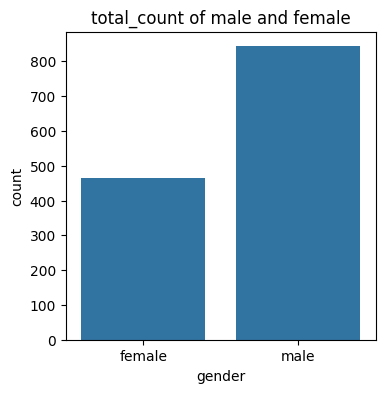

In [251]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='gender')
plt.title('total_count of male and female')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>Male is more than Female in counts. </li>
</ul></h3>

<h3 style="color:orange">2. Plot the total_count of male and female in each passenger class.</h3>

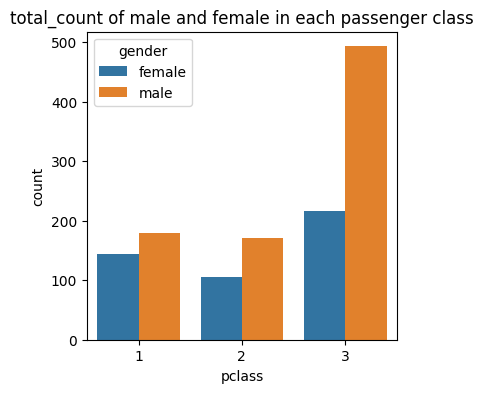

In [252]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='pclass',hue='gender')
plt.title('total_count of male and female in each passenger class')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>3rd class has more males than female and in 2nd and 1st class males are slightly more than females. </li>
</ul></h3>

<h3 style="color:orange">3. Plot the survived and non-survived count of gender.</h3>

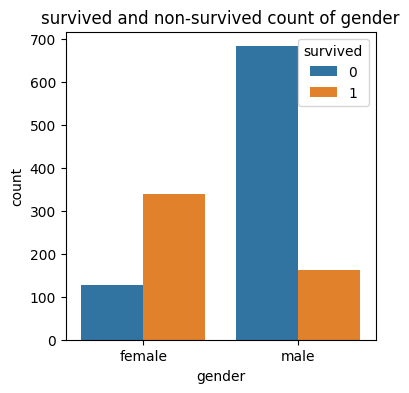

In [253]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='gender',hue='survived')
plt.title('survived and non-survived count of gender')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>Survival count of male is more than female. </li>
</ul></h3>

<h3 style="color:orange">4. Plot the distribution of fare.</h3>

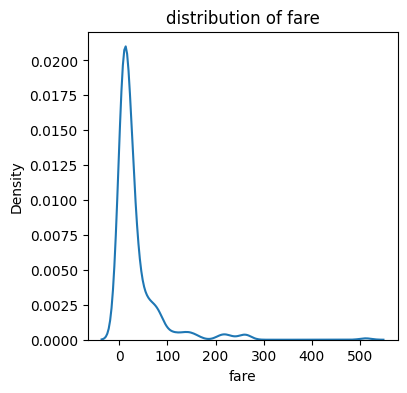

In [254]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=df,x='fare')
plt.title('distribution of fare')
plt.show()

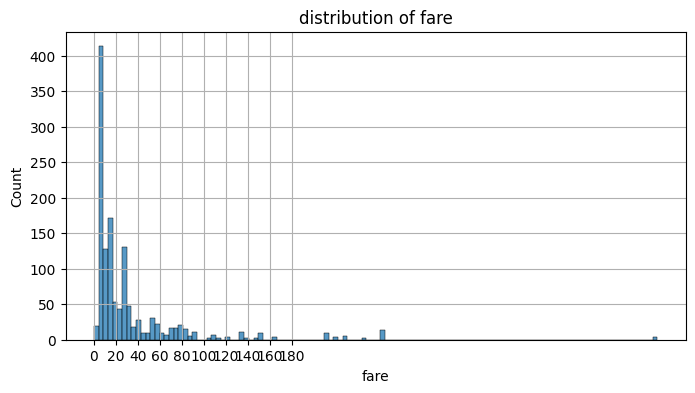

In [255]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='fare')
plt.grid()
plt.xticks(range(0,200,20))
plt.title('distribution of fare')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>More data points are present in 0 to 40. </li>
</ul></h3>

<h3 style="color:orange">5. Plot the distribution of age.</h3>

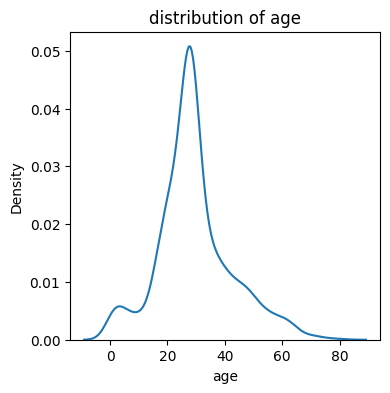

In [256]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=df,x='age')
plt.title('distribution of age')
plt.show()

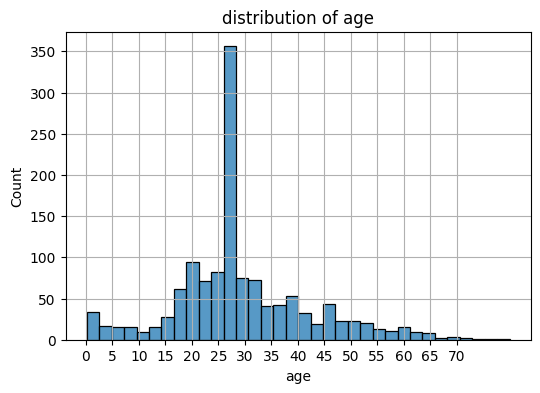

In [257]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='age')
plt.grid()
plt.xticks(range(0,75,5))
plt.title('distribution of age')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>More data points are present in 20 to 40. </li>
</ul></h3>

<h3 style="color:orange">6. Plot the Percentage of age_category.</h3>

In [258]:
df['age_category'].value_counts()
idx=df['age_category'].value_counts().index
val=df['age_category'].value_counts().values
print(idx,val)

CategoricalIndex(['adult', 'teen', 'child', 'senior'], categories=['child', 'teen', 'adult', 'senior'], ordered=True, dtype='category', name='age_category') [1057   99   94   59]


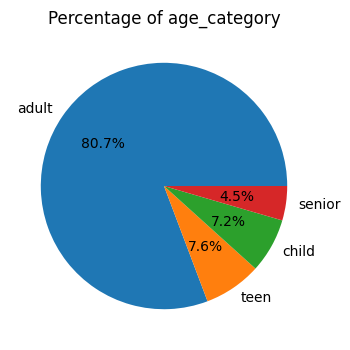

In [259]:
plt.figure(figsize=(6,4))
plt.pie(data=df,x=val,labels=idx,autopct='%.1f%%')
plt.title('Percentage of age_category')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>Adults are more than seniors,child,and teen. </li>
</ul></h3>

<h3 style="color:orange">7. Plot the total_fare of each pclass,gender.</h3>

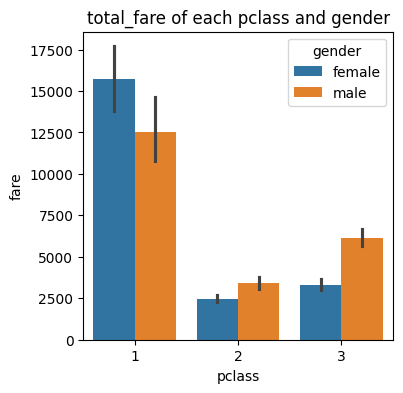

In [260]:
plt.figure(figsize=(4,4))
sns.barplot(data=df,x='pclass',y='fare',hue='gender',estimator='sum')
plt.title('total_fare of each pclass and gender')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>class 1 has mare fare in total than class 2 and 3. </li>
</ul></h3>

<h3 style="color:orange">8. Plot the average_fare of each pclass.</h3>

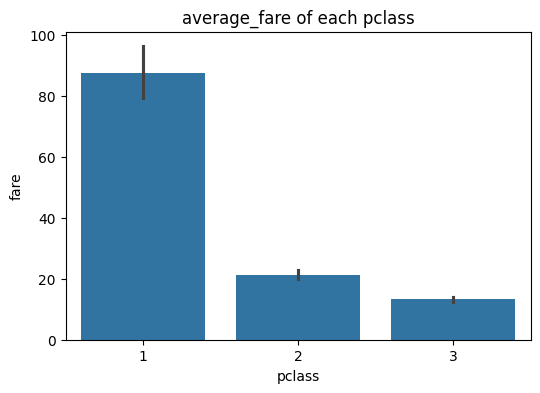

In [261]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x='pclass',y='fare',estimator='mean')
plt.title('average_fare of each pclass')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>The average fare decreases from first to third class, with first class having the highest average fare. </li>
</ul></h3>

<h3 style="color:orange">9. Plot the survival_rate in each pclass.</h3>

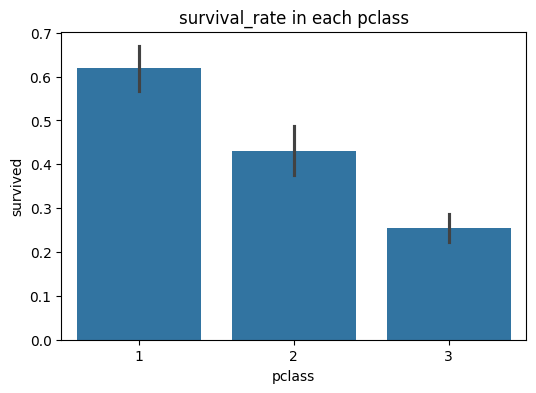

In [262]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x='pclass',y='survived',estimator='mean')
plt.title('survival_rate in each pclass')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>The survival rate is highest in first class and lowest in third class. </li>
</ul></h3>

<h3 style="color:orange">10. Apply scatterplot for fare and age.</h3>

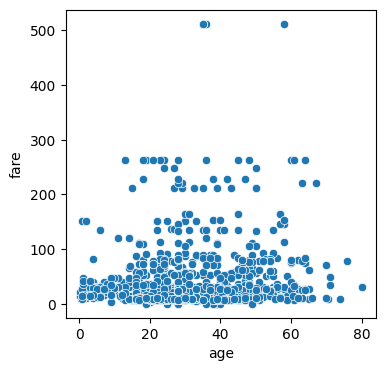

In [263]:
plt.figure(figsize=(4,4))
sns.scatterplot(df,x='age',y='fare')
plt.title('')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>There is no strong correlation between age and fare; high fares are paid across various ages. </li>
</ul></h3>

<h3 style="color:orange">11. Detect the outliers in (i)age (ii)fare.</h3>

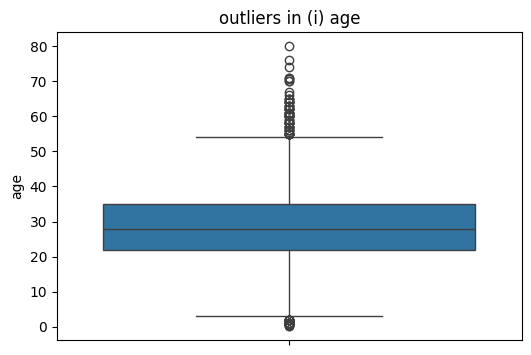

In [264]:
plt.figure(figsize=(6,4))
sns.boxplot(df,y='age')
plt.title('outliers in (i) age')
plt.show()

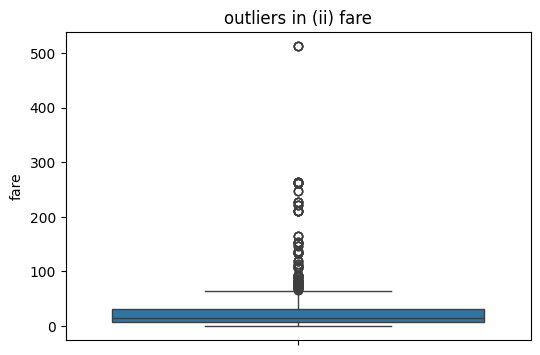

In [265]:
plt.figure(figsize=(6,4))
sns.boxplot(df,y='fare')
plt.title('outliers in (ii) fare')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>Both age and fare have outliers, with fare showing several extreme high values. </li>
</ul></h3>

<h3 style="color:orange">12. Provide Heatmap for numerical columns.</h3>

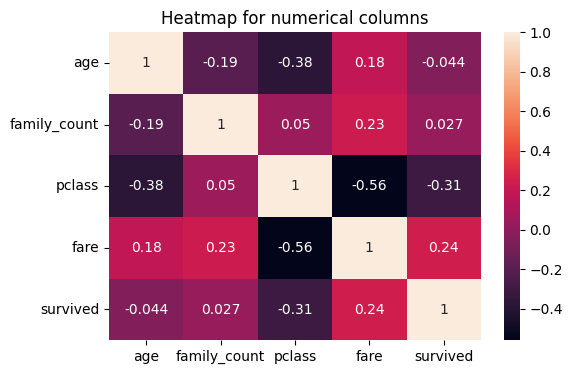

In [266]:
plt.figure(figsize=(6,4))
c=df.corr(numeric_only=True)
sns.heatmap(c,annot=True)
plt.title('Heatmap for numerical columns')
plt.show()

<h3 style='color:Skyblue'>Observation: <ul>
<li>Fare and pclass are negatively correlated; survival is positively correlated with fare and negatively with pclass. </li>
</ul></h3>

<h1 style="color:Red">PANDAS QUESTIONS :</h1>

<h3 style="color:orange">1. Create a dataframe called product (id,pname,price) which includes 3 products.</h3>

table ---> df  
cols  ---> keys  

In [267]:
d={'id':['p1','p2','p3','p4','p5'],'name':['pen','book','charts','markers','white board'],'price':[10,50,5,30,800]}
product_df=pd.DataFrame(data=d)
product_df

,id,name,price
0,p1,pen,10
1,p2,book,50
2,p3,charts,5
3,p4,markers,30
4,p5,white board,800


<h3 style="color:orange">2. Create a jan_sales and feb_Sales(id,sold) which includes 3 sales.</h3>

In [268]:
d={'id':['p1','p3','p2'],'sold':[20,10,30]}
jan_Sales_df = pd.DataFrame(d)

d={'id':['p4','p2','p1','p3'],'sold':[100,5,70,1]}
feb_Sales_df = pd.DataFrame(d)

print(jan_Sales_df)
print()
print(feb_Sales_df)

   id  sold
0  p1    20
1  p3    10
2  p2    30

   id  sold
0  p4   100
1  p2     5
2  p1    70
3  p3     1


In [269]:

print(jan_Sales_df)
print()
print(feb_Sales_df)

   id  sold
0  p1    20
1  p3    10
2  p2    30

   id  sold
0  p4   100
1  p2     5
2  p1    70
3  p3     1


<h3 style="color:orange">3. concat  jan_sales and feb_Sales as sales_df.</h3>

In [270]:
sales_df= pd.concat([jan_Sales_df,feb_Sales_df],ignore_index=True)  #axis=0

sales_df

,id,sold
0,p1,20
1,p3,10
2,p2,30
3,p4,100
4,p2,5
5,p1,70
6,p3,1


<h3 style="color:orange">4. Create a series of loc and concat with sales_df.</h3>

In [271]:
loc = pd.Series(['bengulure','mysure','chennai','mysure','mumbai'],name='location')
loc
sales_df =pd.concat([sales_df,loc],axis=1)
sales_df

,id,sold,location
0,p1,20,bengulure
1,p3,10,mysure
2,p2,30,chennai
3,p4,100,mysure
4,p2,5,mumbai
5,p1,70,NaN
6,p3,1,NaN


<h3 style="color:orange">5. Merge the product and sales.</h3>

In [272]:
pd.merge(left=sales_df,right=product_df,on='id',how='inner')

,id,sold,location,name,price
0,p1,20,bengulure,pen,10
1,p3,10,mysure,charts,5
2,p2,30,chennai,book,50
3,p4,100,mysure,markers,30
4,p2,5,mumbai,book,50
5,p1,70,NaN,pen,10
6,p3,1,NaN,charts,5


In [273]:
pd.merge(left=sales_df,right=product_df,on='id',how='left')

,id,sold,location,name,price
0,p1,20,bengulure,pen,10
1,p3,10,mysure,charts,5
2,p2,30,chennai,book,50
3,p4,100,mysure,markers,30
4,p2,5,mumbai,book,50
5,p1,70,NaN,pen,10
6,p3,1,NaN,charts,5


In [274]:
pd.merge(left=sales_df,right=product_df,on='id',how='right')

,id,sold,location,name,price
0,p1,20.0,bengulure,pen,10
1,p1,70.0,NaN,pen,10
2,p2,30.0,chennai,book,50
3,p2,5.0,mumbai,book,50
4,p3,10.0,mysure,charts,5
5,p3,1.0,NaN,charts,5
6,p4,100.0,mysure,markers,30
7,p5,NaN,NaN,white board,800


In [275]:
pd.merge(left=product_df,right=sales_df,how='cross')

,id_x,name,price,id_y,sold,location
0,p1,pen,10,p1,20,bengulure
1,p1,pen,10,p3,10,mysure
2,p1,pen,10,p2,30,chennai
3,p1,pen,10,p4,100,mysure
4,p1,pen,10,p2,5,mumbai
5,p1,pen,10,p1,70,NaN
6,p1,pen,10,p3,1,NaN
7,p2,book,50,p1,20,bengulure
8,p2,book,50,p3,10,mysure
9,p2,book,50,p2,30,chennai


In [276]:
pd.merge(left=sales_df,right=product_df,how='outer')

,id,sold,location,name,price
0,p1,20.0,bengulure,pen,10
1,p1,70.0,NaN,pen,10
2,p2,30.0,chennai,book,50
3,p2,5.0,mumbai,book,50
4,p3,10.0,mysure,charts,5
5,p3,1.0,NaN,charts,5
6,p4,100.0,mysure,markers,30
7,p5,NaN,NaN,white board,800


<h3 style="color:orange">6. Create a student_df with (name,stream,py,sql,web) attributrs and 5 values.</h3>

In [277]:
student_df =pd.DataFrame({'name':['Nishant','Rahul','Jaimeet','Shodhan','Preet'],'stream':['IT','ECE','CSE','CSE','IT'],'py':[6,8,5,9,3],'sql':[9,5,6,7,8],'web':[7,8,4,3,5]})
student_df

,name,stream,py,sql,web
0,Nishant,IT,6,9,7
1,Rahul,ECE,8,5,8
2,Jaimeet,CSE,5,6,4
3,Shodhan,CSE,9,7,3
4,Preet,IT,3,8,5


<h3 style="color:orange">7. Perform melt operation.</h3>

In [284]:
student_df

,name,stream,py,sql,web
0,Nishant,IT,6,9,7
1,Rahul,ECE,8,5,8
2,Jaimeet,CSE,5,6,4
3,Shodhan,CSE,9,7,3
4,Preet,IT,3,8,5


In [285]:
student_df.melt()

,variable,value
0,name,Nishant
1,name,Rahul
2,name,Jaimeet
3,name,Shodhan
4,name,Preet
5,stream,IT
6,stream,ECE
7,stream,CSE
8,stream,CSE
9,stream,IT


In [281]:
melt_df=pd.melt(student_df,id_vars=['name','stream'],value_vars=['py','sql','web'],var_name='subj',value_name='score')
melt_df

,name,stream,subj,score
0,Nishant,IT,py,6
1,Rahul,ECE,py,8
2,Jaimeet,CSE,py,5
3,Shodhan,CSE,py,9
4,Preet,IT,py,3
5,Nishant,IT,sql,9
6,Rahul,ECE,sql,5
7,Jaimeet,CSE,sql,6
8,Shodhan,CSE,sql,7
9,Preet,IT,sql,8


<h3 style="color:orange">8. Perform pivot operation.</h3>

In [279]:
pd.pivot(melt_df,index=['name','stream'],columns=['subj']).reset_index()

name stream score        
subj                    py sql web
0     Jaimeet    CSE     5   6   4
1     Nishant     IT     6   9   7
2       Preet     IT     3   8   5
3       Rahul    ECE     8   5   8
4     Shodhan    CSE     9   7   3

<h3 style="color:orange">9. Perform pivot_table()</h3>

In [280]:
pd.pivot_table(melt_df,index=['name','stream'],columns=['subj'],values='score',aggfunc='sum',margins=True,margins_name='total')

,subj,py,sql,web,total
name,stream,,,,
Jaimeet,CSE,5,6,4,15
Nishant,IT,6,9,7,22
Preet,IT,3,8,5,16
Rahul,ECE,8,5,8,21
Shodhan,CSE,9,7,3,19
total,,31,35,27,93
